<h1><center><b>Machine Learning</b></center></h1>

## Part 1 - Neural Network using NumPy

In this part we learn to:
1. Load and preprocess datasets.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using numpy only.




### **1. Dataset**


Import useful packages

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Download the MNIST dataset

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


Data normalization

In [ ]:
## TODO: Normalize the dataset according to Min-Max normalization.
def min_max_norm(X):
  # Compute the max feature value.
  max_value_feature = np.max(X)
  # Compute the min feature value.
  min_value_feature = np.min(X)
  # Calculate the numerator: subtracted the min value from each feature in the data set.
  X_norm = X - min_value_feature
  # Calculate the range of the data set.
  X_range = max_value_feature - min_value_feature
  # Calculate the normaliztion of each feature in the data set.
  norm_data = X_norm / X_range
  # adding the Normalize sample to norm_data.
  print(norm_data)
  return norm_data

X = min_max_norm(X)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Split the data into Train set and Test set

In [ ]:
## TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
#  X.shape[0] -> that way we check the number of rows in the data set,
# we multiply this number by 0.8, meaning the result will be the number of rows
# that we will take from the tata set to the train set (80%).
# the rest will go to the test set (20%)
# the exactly the same is how we compute the labels
#len_train_set = int(0.8 * X.shape[0])
permutation = np.random.permutation(len(X))
X = X[permutation]
y = y[permutation]
X_train, X_test = X[0:int(0.8 * X.shape[0])], X[int(0.8 * X.shape[0]):]
y_train, y_test = y[0:int(0.8 * X.shape[0])], y[int(0.8 * X.shape[0]):]

print(f"y train: {y_train}")
print(f"y train number of rows: {y_train.shape[0]}")
print(f"y train shape: {y_train.shape}")
print(f"y train type: {type(y_train[0])}")
print(f"x train first column: {X_train[:,0].shape}")
print(f"x train: {X_train[0].shape}")


y train: ['5' '6' '9' ... '4' '6' '8']
y train number of rows: 56000
y train shape: (56000,)
y train type: <class 'str'>
x train first column: (56000,)
x train: (784,)


Activation function

In [ ]:
## Here you should Implement the sigmoid activation function and its derivative
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
  return (sigmoid(z))*(1-sigmoid(z))

Softmax function

In [ ]:
## Here you should Implement the softmax function

def softmax(z):
  return np.exp(z) / sum(np.exp(z))

Loss function

In [ ]:
## Negative Log Likelihood loss function for the multiclass

def nll_loss(y_pred, y):
  loss = -np.sum(y * np.log(y_pred))
  return loss / float(y_pred.shape[0])

Hyper-Parameters

In [ ]:
## Here you should define the main hyper-parameters we discussed about at class.

# Your code here
num_of_epochs = 10
learning_rate = 0.1

Parameters initialization

In [ ]:
## Here you should initialize the parameters.

# Since simple neural networks get vectors as inputs, and not images (unlike CNNs),
# we should flatten the data. Each sample with shape (28,28) becomes (784,).
# That is why the input layer has 784 units
input_layer_features = X.T.shape[0] # = 784
# Initialize the number of nearal in the hidden layer as we saw in class.
hidden_layer_neurals = 64
## Note that the MNIST dataset has 10 classes.
output_layer_predictions = 10

W1 = np.random.randn(input_layer_features, hidden_layer_neurals)
b1 = np.zeros(hidden_layer_neurals)
W2 = np.random.randn(hidden_layer_neurals, output_layer_predictions)
b2 = np.zeros(output_layer_predictions)





### **2. Training**


In [ ]:
def train(X, y, num_of_epochs):
  train_size = len(X)
  global input_layer_features, hidden_layer_neurals, output_layer_predictions
  global W1, b1, W2, b2


  for epoch in range(num_of_epochs):
    avg_epoch_loss = 0
    for i in range(train_size):

      # We will follow the diagram in lucture 7 skufit 20.
      # TODO :  Forward propagation

      # convert the 1D input data array into a 2D array so we can multiplie X[i] with W1
      z1 = np.dot(X[i], W1) + b1
      h1 = sigmoid(z1)
      Z2 = np.dot(h1, W2) + b2
      y_hat = softmax(Z2)

      # One-hot encode the integer labels
      array_one_hot_y_true = np.zeros(y_hat.shape)
      array_one_hot_y_true[int(y[i])] = 1
      y_true = array_one_hot_y_true

      # TODO: Compute loss
      loss =  nll_loss(y_hat, y_true)
      avg_epoch_loss = avg_epoch_loss + loss

      # TODO: Back propagation - compute the gradients of each parameter
      dZ2 = (y_hat - y_true)

      # dZ2 is dim (number of features in the output layer) 10
      # h1 is dim (number of features in the hidden layer) 32
      # we will change the dim so we can calculate the dot product between those 2 vctors
      # meaning we reshpae them as (10,1) and (1,32) to get dW2 with (10,32) dim.
      dZ2_reshapeDIM = dZ2.reshape(output_layer_predictions, 1)
      h1_reshapeDIM = h1.reshape(1, hidden_layer_neurals)
      dW2 = np.dot(dZ2_reshapeDIM, h1_reshapeDIM)
      db2 = dZ2

      # W2 is dim (hidden layer, output lyaer) meaning (32, 10)
      # dZ2 is dim (number of features in the output layer) (10,0)
      # we can calculate the dot product and get (32, 0) dim.
      dh1 = np.dot(W2, dZ2)

      # dh1 is dim (32,0)
      # Apply derivative of the nonlinear function sigmoid with input
      # z1 of dim (32,0) will keep the result (32,0) dim.
      # finnaly we will get dz1 with (32,0) dim
      dz1 = dh1 * sigmoid_derivative(z1)

      # We wil do the same proccess as we calculate dW2
      # X[i] with dim (784,0) dim (as the number of features in the input layer)
      # We reshapte them s.t dz1 will be (hidden layer dim, 1)
      # and X[i] will be (1, dim of the input layer)
      dz1_reshapeDIM = dz1.reshape(hidden_layer_neurals, 1)
      X_i_reshapeDIM = X[i].reshape(1, input_layer_features)
      dW1 = np.dot(dz1_reshapeDIM, X_i_reshapeDIM)
      db1 = dz1

      # TODO: Update weights
      W2 = W2 - learning_rate * dW2.T
      b2 = b2 - learning_rate * db2
      W1 = W1 - learning_rate * dW1.T
      b1 = b1 - learning_rate * db1

    avg_epoch_loss = (avg_epoch_loss/train_size)

    print("Epoch:", epoch," Loss:", avg_epoch_loss)


### **3. Test**

Here you should test your model

In [ ]:
## Here you should test your model and return the accuracy on the test set
def test(X, y):
  true_pred_counter = 0
  # Your code here
  global W1, b1, W2, b2

  # We iterate over the test set and predict the output per sample:
  for i in range (len(X)):
    # Calculate Forawrds like in the train method
    z1 = np.dot(X[i], W1) + b1
    h1 = sigmoid(z1)
    Z2 = np.dot(h1, W2) + b2
    y_hat = softmax(Z2)

    # We check if the prediction (y_hat) is the same as the true label y
    if  int(y[i]) == np.argmax(y_hat):
      true_pred_counter += 1

  # Colculate the accuracy
  accuracy = true_pred_counter / len(X)
  return accuracy



### **4. Main**

In [ ]:
train(X_train, y_train, num_of_epochs)
accuracy = test(X_test, y_test)

print(accuracy)

Epoch: 0  Loss: 0.04254883142955044
Epoch: 1  Loss: 0.023137800245427064
Epoch: 2  Loss: 0.018381565770429247
Epoch: 3  Loss: 0.015218264611742824
Epoch: 4  Loss: 0.013044964818062181
Epoch: 5  Loss: 0.011632962816638377
Epoch: 6  Loss: 0.01053229897383635
Epoch: 7  Loss: 0.009608129359618965
Epoch: 8  Loss: 0.008760321169289837
Epoch: 9  Loss: 0.008139231031412179
0.9562857142857143


## Part 2 - Neural Network in PyTorch

____________

In this part we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST.

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.6 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "machine_learning_intro/assignments/assignment5") and mount that data to the machine. See the next cell below.  
In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted (not a frequent event).

In [ ]:
# check python version
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'machine_learning_intro/assignments/assignment5/'
FOLDERNAME = 'ML/neural_network/'
ASSIGNMENTNAME = 'ass_neural_network.ipynb'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
cp: cannot stat 'ML/neural_network//ass_neural_network.ipynb': No such file or directory
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [ ]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 67505201.82it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 93109680.11it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38859653.52it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7145734.72it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data.
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [ ]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)

# 1. Print the number of samples in the whole dataset.
print(f"The number of samples in the whole dataset is: {len(mnist_dataloader.dataset)}")

# 2. Print the number of samples in a single batch.
print(f"The number of samples in a single batch is: {mnist_dataloader.batch_size}")

# 3. Print the shape of images in the data (image dimensions).
print(f"The number of samples in a single batch is: {batch_images[0].shape}")

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
print(f"The number of samples in a single batch is: {len(mnist_data.targets)}")

The number of samples in the whole dataset is: 60000
The number of samples in a single batch is: 64
The number of samples in a single batch is: torch.Size([1, 28, 28])
The number of samples in a single batch is: 60000


Labels: tensor([1, 4, 4])


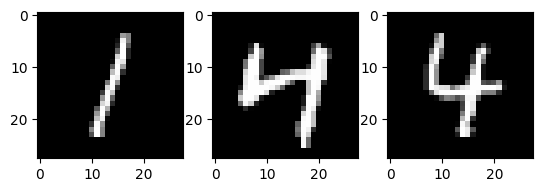

In [ ]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


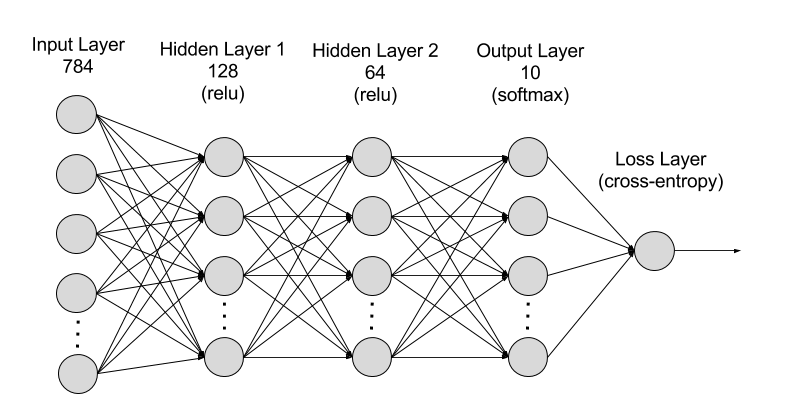

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
class NeuralNetwork(nn.Module):
    '''
    you can set inside the forward function or method all the layers that
    don’t have any weights to be refreshed or in other words updated.
    On the opposite side,
    you must update all the layers that have weights in the __init__.
    '''
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        # Gets the array 784 in length and outputs one with 128 in length
        self.fc1 = nn.Linear(784, 128)
        # Gets the array 128 in length and outputs one with 64 in length
        self.fc2 = nn.Linear(128, 64)
        # Gets the array 64 in length and outputs one with 10 in length
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        # Setting how the model layers must be connected
        # Apply the  RELU activation function on the layer output 'self.conv1 = nn.Linear(784, 128)'
        x = F.relu(self.fc1(x))
        # Apply the  RELU activation function on the layer output 'self.conv2 = nn.Linear(128, 64)'
        x = F.relu(self.fc2(x))
        # Passing the array within the lastest linear layer 'self.conv3 = nn.Linear(64, 10)'
        x = self.fc3(x)
        return F.log_softmax(x, -1)

model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [ ]:
def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  images.resize_(64, 1, 784)
  img = images[0]

  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)

  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps

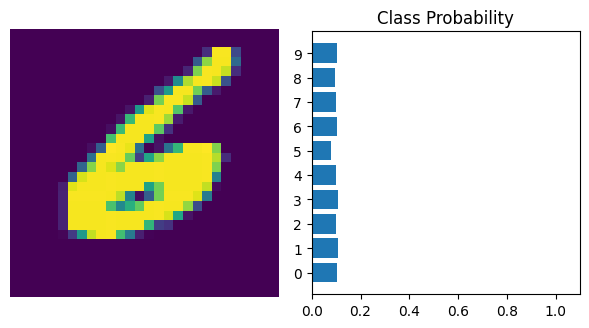

In [ ]:
# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

Print the prediction of the network for that sample:

In [ ]:
# ps is the exponential for probabilities of the output.
# This element is saved in variable preds_conf (of type torch.Tensor).
# We take the maximum arg from this probabilities and this will be the prediction.
prediction = preds_conf.argmax().item()
print(f"Prediction of the network for that random sample is: {prediction}")

Prediction of the network for that random sample is: 1


### **4. Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set.
7. During training, for each epoch, track the training loss and validation loss.

In [ ]:
from torch.utils import data

In [ ]:
'''
As reccomennded: see Section 2 for examples:
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)
'''
data_loader = mnist_dataloader.dataset
# 1. split trainset into train and validation (use torch.utils.data.random_split())

# Calculate 80% for the training set.
train_len = int(0.8 * len(data_loader))
# Calculate 20% for the validation set.
validation_len = int(0.2 * len(data_loader))
# List of the sizes of the train and validtation sets:
len_sets = [train_len, validation_len]
# torch.utils.data.random_split() will as first argument the data
# and the second argument the list of the length of the traing set and validation set
train_set, val_set = torch.utils.data.random_split(data_loader, len_sets)

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

In [ ]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5

In [ ]:
model = NeuralNetwork()

# 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above
optimizer = optim.SGD(model.parameters(), learning_rate)


# 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)
criterion = nn.NLLLoss()

In [ ]:
# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode
          ######################

          # Forward propagation:

          # Zero the gradient buffers, this way the update rule of each iter
          optimizer.zero_grad()
          # Passing your images into the neural network model
          # y_hats is the predictions of the model
          y_hats = model.forward(images)
          # measuring the loss function, labels are y_true
          loss = criterion(y_hats, labels)

          # Back propagation:
          # Here we are propagiting the loss back
          loss.backward()

          # Finally, we gonna Update all the weights of your neural network model
          optimizer.step()

          ######################
          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)

                  ######################
                  ### YOUR CODE HERE ###
                  ######################

                  model.eval()
                  # Passing your images into the neural network model
                  # y_hats is the predictions of the model
                  y_hats = model.forward(images)
                  val_loss = criterion(y_hats, labels)

                  ######################

                  running_val_loss += val_loss.item()

          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

In [ ]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

Epoch: 1/5..  Training Loss: 2.029..  Validation Loss: 1.567.. 
Epoch: 2/5..  Training Loss: 1.071..  Validation Loss: 0.737.. 
Epoch: 3/5..  Training Loss: 0.622..  Validation Loss: 0.529.. 
Epoch: 4/5..  Training Loss: 0.490..  Validation Loss: 0.445.. 
Epoch: 5/5..  Training Loss: 0.428..  Validation Loss: 0.402.. 


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

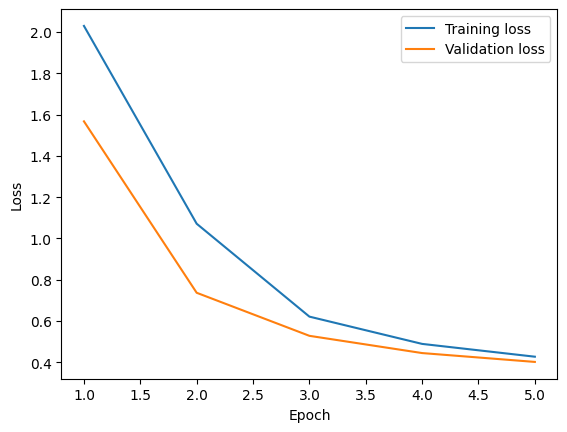

In [ ]:
# plot train and validation loss as a function of #epochs
######################

epochs = np.arange(1, len(train_losses) + 1)

plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()
######################

With the network trained, we can check out it's predictions:

tensor([[2.6146e-05, 1.0984e-03, 1.0570e-03, 9.6315e-01, 5.7991e-06, 6.8880e-03,
         2.8674e-07, 1.5367e-03, 2.5347e-02, 8.9136e-04]])

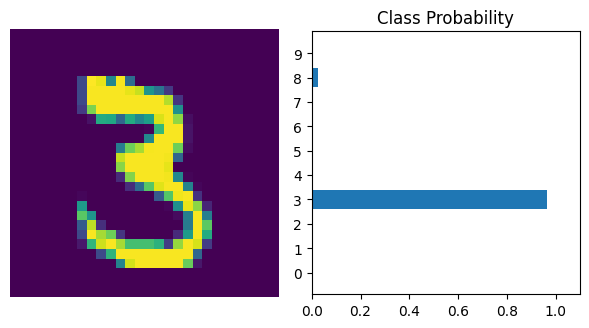

In [ ]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [ ]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          if is_image_input:
            # flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          log_ps = model(images)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)

          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [ ]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

Validation accuracy: 0.8854166865348816


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

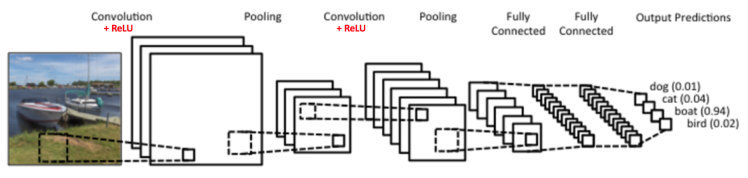

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters) without padding?

**A1:**

<font color='red'>
As we can see in the article suggested in the reminder, to caculate the shape of the output we use the equation:

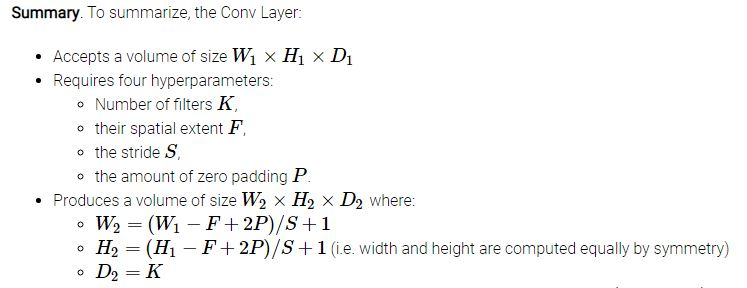

<br>Meaning:
<br>Width = ((input_width - kernel_width + 2*padding) / stride) + 1
<br>Height = ((input_height - kernel_height + 2*padding) / stride) + 1
<br>Depth = number_of_filters
<br>In our case:
<br>Width = (28 - 5 + 2 * 0) / 1 + 1 = 24
<br>Height = (28 - 5 + 2 * 0) / 1 + 1 = 24
<br>Depth = 10
<br>Shape volume of the output will be: [24, 24, 10]
</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding?

**A2:**
<font color='red'>
<br>We need to understand how much pixel of padding to add.
<br>We will isolate from the equation above the padding parameter (The <br>calculation is symetrical of all the sides of the image):
<br>Output = ((input - kernel + 2padding) / stride) + 1
<br>-> Output - 1 = ((input - kernel + 2padding) / stride)
<br>-> Output * stride - stride = (input - kernel + 2padding)
<br>-> Output * stride - stride - input + kernel = 2padding
<br>-> padding = (Output * stride - stride - input + kernel) / 2
<br> We want our output to be 28, our input as before is the same, stride and <br> karnel as the same as the previouse question so we get:
<br>-> padding = (28 * 1 - 1 - 28 + 5) / 2 = 2
<br> The padding should be 2.
<br>( Note: to get the output and the input shape to be the same we wil need to change the karnel and stride also, but it is not asked in the question).

</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

**A3:**
<font color='red'>
Well this is awkward, it is the formula we used to caculate the answer above:
<br>Wₒᵤₜ = (Wᵢₙ - F + 2P)/S + 1
<br>Hₒᵤₜ = (Hᵢₙ - F + 2P)/S + 1
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [ ]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [ ]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.01

In [ ]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 1.408..  Validation Loss: 0.348.. 
Epoch: 2/3..  Training Loss: 0.263..  Validation Loss: 0.196.. 
Epoch: 3/3..  Training Loss: 0.167..  Validation Loss: 0.138.. 


In [ ]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9599999785423279


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.

You should consider changing:
1. Prepocess:
  - Change normalization
  - Better representation of the data

1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

1. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs



In [ ]:
# 1. split trainset into train and validation (use torch.utils.data.random_split())
data_loader = mnist_dataloader.dataset
# Calculate 80% for the training set.
train_len = int(0.8 * len(data_loader))
# Calculate 20% for the validation set.
validation_len = int(0.2 * len(data_loader))
# List of the sizes of the train and validtation sets:
len_sets = [train_len, validation_len]
# torch.utils.data.random_split() will as first argument the data
# and the second argument the list of the length of the traing set and validation set
train_set, val_set = torch.utils.data.random_split(data_loader, len_sets)

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)


In [ ]:
## Find network and hyperparams that achieve best validation accuracy as possible
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1) # 64 kernels, 3x3 kernel size
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # 128 kernels, 3x3 kernel size
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # 460 kernels, 3x3 kernel size
        self.fc1 = nn.Linear(256 * 3 * 3, 100) # 100 units
        self.fc2 = nn.Linear(100, 50) # 50 units
        self.fc3 = nn.Linear(50, 10) # 10 units
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.batch_norm2 = nn.BatchNorm2d(128)
        self.batch_norm3 = nn.BatchNorm2d(256)
        self.dropout1 = nn.Dropout(p=0.4)
        self.dropout2 = nn.Dropout(p=0.2)


    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = self.batch_norm1(x)
        x = F.relu(x) # relu
        x = F.max_pool2d(x, 2) # max pooling 1
        x = self.dropout1(x)
        x = self.conv2(x) # conv 2
        x = self.batch_norm2(x)
        x = F.relu(x) # relu
        x = F.max_pool2d((x), 2) # max pooling 2
        x = self.dropout2(x)
        x = self.conv3(x) # conv 3
        x = self.batch_norm3(x)
        x = F.relu(x) # relu
        x = F.max_pool2d((x), 2) # max pooling 3
        # veiew is used to reshape tensors
        x = x.view(-1, 256*3*3) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.dropout1(x)
        x = self.fc2(x) # hidden layer 2
        x = F.relu(x) # relu
        self.dropout2(x)
        x = self.fc3(x) # hidden layer 3
        return F.log_softmax(x, dim=1) #output

# Training hyperparameters

def training_hyperparameters(optimizers, cnn_criterion,
                cnn_nepochs, learning_rate):
  train_losses, val_losses = [], []
  best_evaluate = 0
  model_number = 1
  for optimizer in optimizers:
    '''
    The train method will be exactly the same as we did before, so we just
    send the model with his hyperparamters to this function we made in part 4.
    we will save the evaluation using adam then we send train the model again
    with RMSprop, if the avaltaion will be higher we will save the model using RMSprop
    else we save the model using adam. The other hyperparamters we will check manualy
    and will run it over and over again with diffreny hyperparamters.
    '''
    # Creating model for training
    cnn_model = ConvolutionalNet()
    # Define the optimizer
    cnn_optimizer = optimizer(cnn_model.parameters(), lr=cnn_learning_rate)
    print (f"Training model number {model_number} : ")
    print (f"Model optimizer is:  {cnn_optimizer.__class__.__name__}")
    print (f"Model learning rate is:  {learning_rate}")
    train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)
    temp_evaluate = evaluate_model(cnn_model, val_loader, is_image_input=False)
    print(f"Validation accuracy of model number {model_number} is: {temp_evaluate}")
    model_number += 1
    if temp_evaluate > best_evaluate:
        best_evaluate = temp_evaluate
        best_model = cnn_model
  return best_model


In [ ]:
# save the best model in this variable
# Define negative log likelyhood as the loss function
cnn_criterion = nn.NLLLoss()
# We the adam and RMSprop as suggested in class
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
nepochs = 5
learning_rate = 0.005

best_model = training_hyperparameters(optimizers, cnn_criterion, nepochs, learning_rate)

Training model number 1 : 
Model optimizer is:  Adam
Model learning rate is:  0.005
Epoch: 1/5..  Training Loss: 0.519..  Validation Loss: 0.090.. 
Epoch: 2/5..  Training Loss: 0.185..  Validation Loss: 0.066.. 
Epoch: 3/5..  Training Loss: 0.145..  Validation Loss: 0.059.. 
Epoch: 4/5..  Training Loss: 0.128..  Validation Loss: 0.060.. 
Epoch: 5/5..  Training Loss: 0.118..  Validation Loss: 0.063.. 
Validation accuracy of model number 1 is: 0.9854166507720947
Training model number 2 : 
Model optimizer is:  SGD
Model learning rate is:  0.005
Epoch: 1/5..  Training Loss: 0.967..  Validation Loss: 0.185.. 
Epoch: 2/5..  Training Loss: 0.216..  Validation Loss: 0.096.. 
Epoch: 3/5..  Training Loss: 0.150..  Validation Loss: 0.080.. 
Epoch: 4/5..  Training Loss: 0.119..  Validation Loss: 0.066.. 
Epoch: 5/5..  Training Loss: 0.102..  Validation Loss: 0.061.. 
Validation accuracy of model number 2 is: 0.9801666736602783
Training model number 3 : 
Model optimizer is:  RMSprop
Model learning 

When you are satisfied with your model performance on the validation set, load the test set given to you (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Upload the file to the "submit" system with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

In [ ]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [ ]:
# run this to save test predictions to "predictions.txt"
test_path = "/content/drive/My Drive/ML/neural_network/mnist_test.pth"
predict_and_save(best_model, test_path, file_name="predictions.txt")